In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [13]:
img = cv.imread('Images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_GRAYSCALE)

# Define the LoG function for a 2D kernel
def laplacian_of_gaussian_kernel(sigma):
    size = int(np.ceil(3 * sigma) * 2 + 1)
    # Create a 2D grid of (x, y) coordinates
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    # Calculate the LoG using the formula
    squared_distances = xx**2 + yy**2
    log = (-1/(np.pi * sigma**4)) * (1 - (squared_distances / (2 * sigma**2))) * np.exp(-squared_distances / (2 * sigma**2))
    
    return log

def apply_log_filter_cv(image, sigma):
    log_kernel = laplacian_of_gaussian_kernel(sigma)
    # Apply the LoG filter using OpenCV's filter2D
    # -1 indicates the depth of the output image is the same as the source
    filtered_image = cv.filter2D(image, ddepth=-1, kernel=log_kernel)

    return filtered_image

In [ ]:
# # Apply the LoG filter to the image for r 1 to 10 with 
# for r in range(1, 20):
#     sigma = r/1.414
#     kernel = laplacian_of_gaussian_kernel(sigma)
#     log_image = cv.filter2D(img, -1, kernel)
#     plt.imshow(log_image, cmap='gray')
#     plt.title(f'LoG Filter with r={r}')
#     plt.show()

In [6]:
def detect_max(img_log, sigma):
    coordinates = []
    (h, w) = img_log.shape
    k = 1
    for i in range(k, h-k):
        for j in range(k, w-k):
            slice_img = img_log[i-k:i+k+1, j-k:j+k+1]
            result = np.max(slice_img) # finding maximum
            if result >= 0.09: # threshold
                x, y = np.unravel_index(slice_img.argmax(), slice_img.shape)
                coordinates.append((i+x-k, j+y-k)) #finding co-rdinates
    return set(coordinates)

(np.float64(-27.425), np.float64(359.5), np.float64(359.5), np.float64(-0.5))

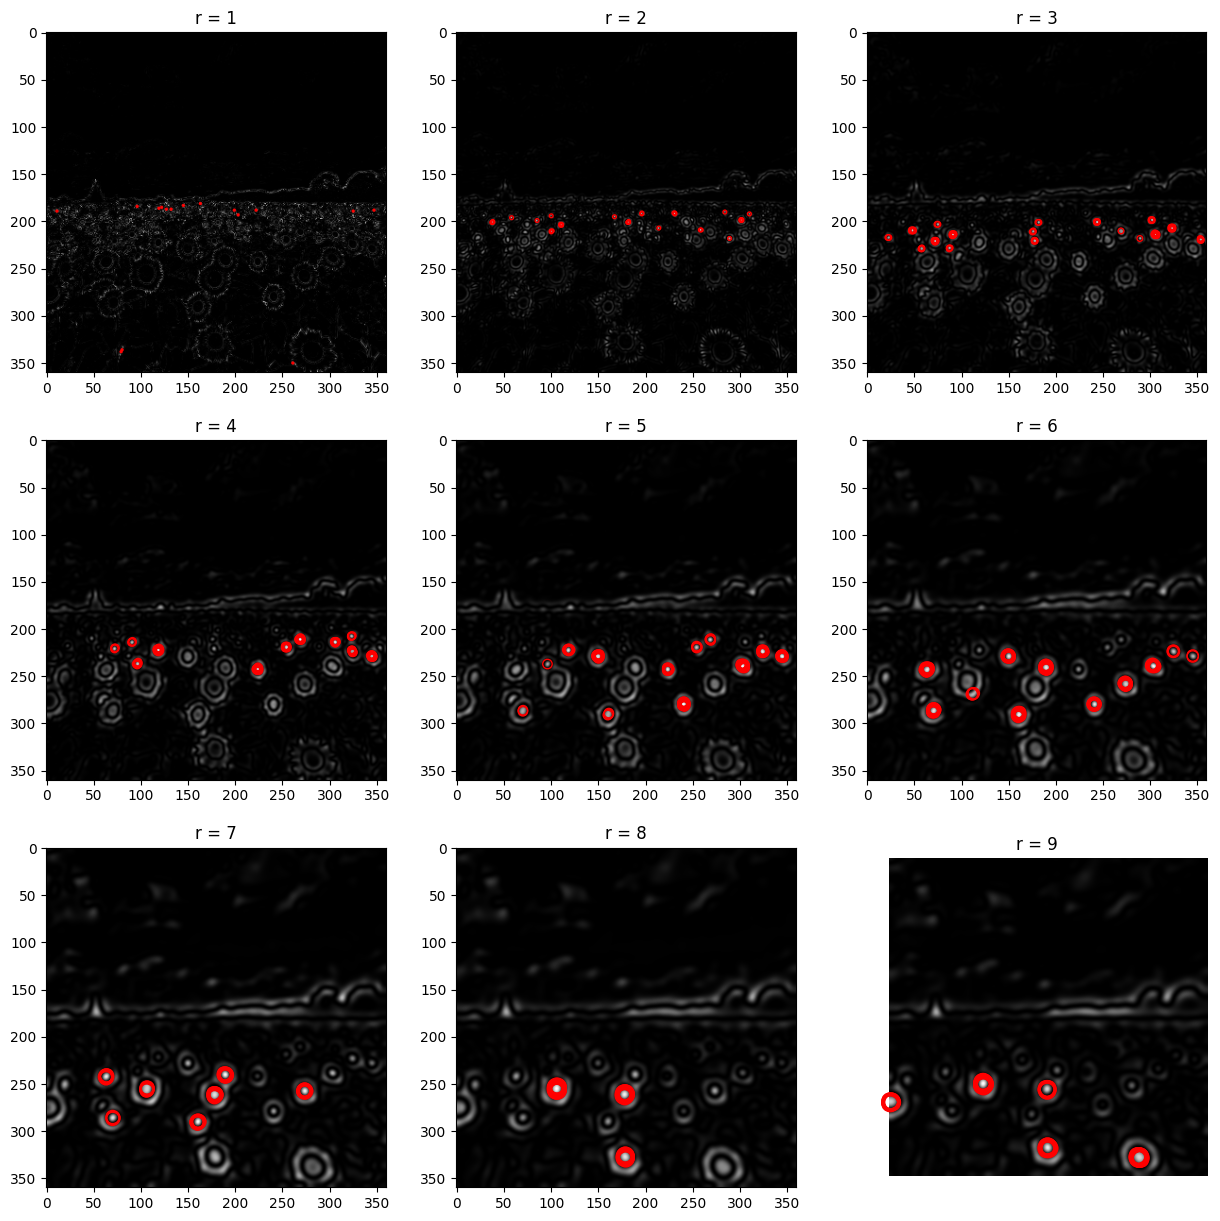

In [14]:
img1 = cv.imread('Images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY) / 255

fig, axes = plt.subplots(3, 3, figsize = (15, 15))

# Finding local peaks for each sigma
for r, ax in enumerate(axes.flatten(), start = 1):
    sigma = r/1.414
    LOG = sigma**2 * laplacian_of_gaussian_kernel(sigma)
    img1_log = np.square(cv.filter2D(img1, -1, LOG))

    coordinates = detect_max(img1_log, sigma)

    ax.imshow(img1_log, cmap = 'gray')
    ax.set_title(f'r = {r}')

    for x, y in coordinates:
        c = plt.Circle((y, x), sigma * 1.414, color = 'red', linewidth=1, fill=False)
        ax.add_patch(c)
    ax.plot()

plt.axis('off')

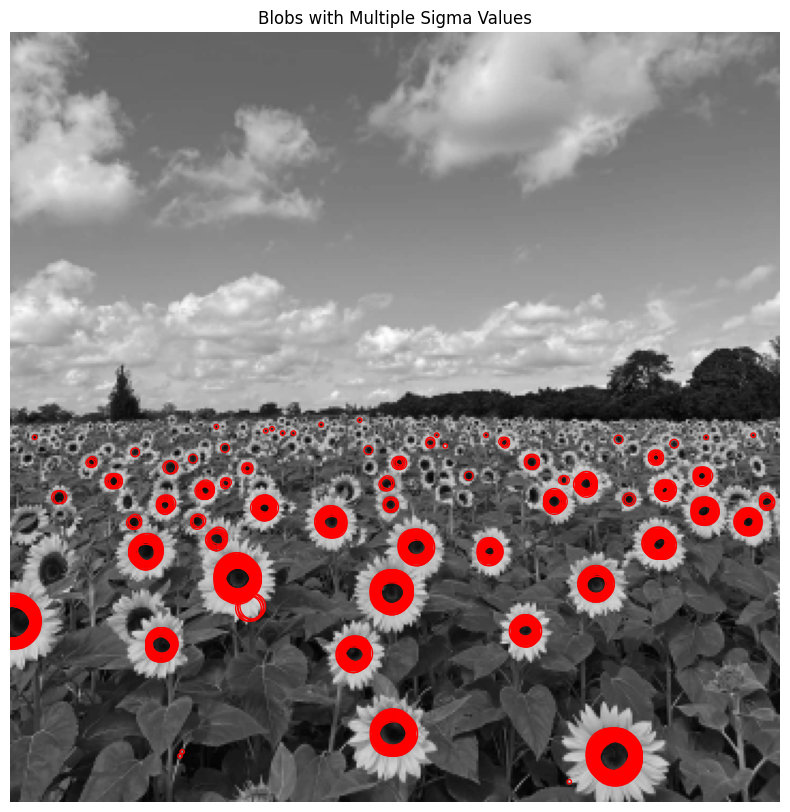

In [18]:
img1 = cv.imread('Images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY) / 255

# Plot setup for a single figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img1, cmap='gray')
ax.set_title('Blobs with Multiple Sigma Values')

# Detect blobs for each sigma and plot them on the same image
for r in range(1, 10):
    sigma = r / 1.414
    LOG = sigma**2 * laplacian_of_gaussian_kernel(sigma)
    img1_log = np.square(cv.filter2D(img1, -1, LOG))

    # Detect local maxima (blobs) for the current sigma
    coordinates = detect_max(img1_log, sigma)

    # Plot circles around detected blobs
    for x, y in coordinates:
        c = plt.Circle((y, x), sigma * 1.414, color='red', linewidth=1, fill=False)
        ax.add_patch(c)

# Hide axis and display the image
plt.axis('off')
plt.show()